In [30]:
import pickle
import pandas as pd
from collections import defaultdict

In [121]:
df = pd.DataFrame([(k, lc_conv_back[k], shapley_conv_back[k], lc_receita_back[k],
                    shapley_receita_back[k]) for k in shapley_conv_back.keys() | lc_conv_back.keys()])
df.to_csv('lc_shapley_backend.csv')
df = pd.DataFrame([(k, lc_conv_front[k], shapley_conv_front[k], lc_receita_front[k],
                    shapley_receita_front[k]) for k in shapley_conv_front.keys() | lc_conv_front.keys()])
df.to_csv('lc_shapley_frontend.csv')

In [122]:
print(sum(lc_receita_front.values()),
sum(shapley_receita_front.values()))

15561950.129998168 15561950.130000716


In [123]:
with open('last_click_receita_Backend.pickle', 'rb') as file:
    lc_receita_back = defaultdict(float, pickle.load(file))

In [124]:
with open('last_click_receita_Frontend.pickle', 'rb') as file:
    lc_receita_front = defaultdict(float, pickle.load(file))

In [125]:
with open('shapley_sp_receita_Frontend.pickle', 'rb') as file:
    shapley_receita_front = pickle.load(file)

In [126]:
with open('shapley_sp_receita_Backend.pickle', 'rb') as file:
    shapley_receita_back = pickle.load(file)

In [127]:
with open('shapley_sp_conversoes_Backend.pickle', 'rb') as file:
    shapley_conv_back = pickle.load(file)

In [128]:
with open('last_click_conversoes_Frontend.pickle', 'rb') as file:
    lc_conv_front = defaultdict(float, pickle.load(file))

In [129]:
with open('last_click_conversoes_Backend.pickle', 'rb') as file:
    lc_conv_back = defaultdict(float, pickle.load(file))

In [130]:
with open('shapley_sp_conversoes_Frontend.pickle', 'rb') as file:
    shapley_conv_front = pickle.load(file)

In [180]:
for d in (lc_receita_back, lc_receita_front, shapley_receita_front, shapley_receita_back,
         shapley_conv_back, lc_conv_front, lc_conv_back, shapley_conv_front):
    deleted_writers = ('Victor Weiler - Backend', 'Victor Weiler - Frontend',
                       'Roberto Altenhofen - Backend', 'Roberto Altenhofen - Frontend',
                       'Renato Torelli - Backend', 'Renato Torelli - Frontend')
    for dw in deleted_writers:
        d.pop(dw, None)

In [173]:
def autolabel(rects, kv):
    vals = [v for v in kv.values()]
    for ii, rect in enumerate(rects):
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2, 1.02*height, f'{vals[ii]:.2f}', ha='center',
                 va='bottom')

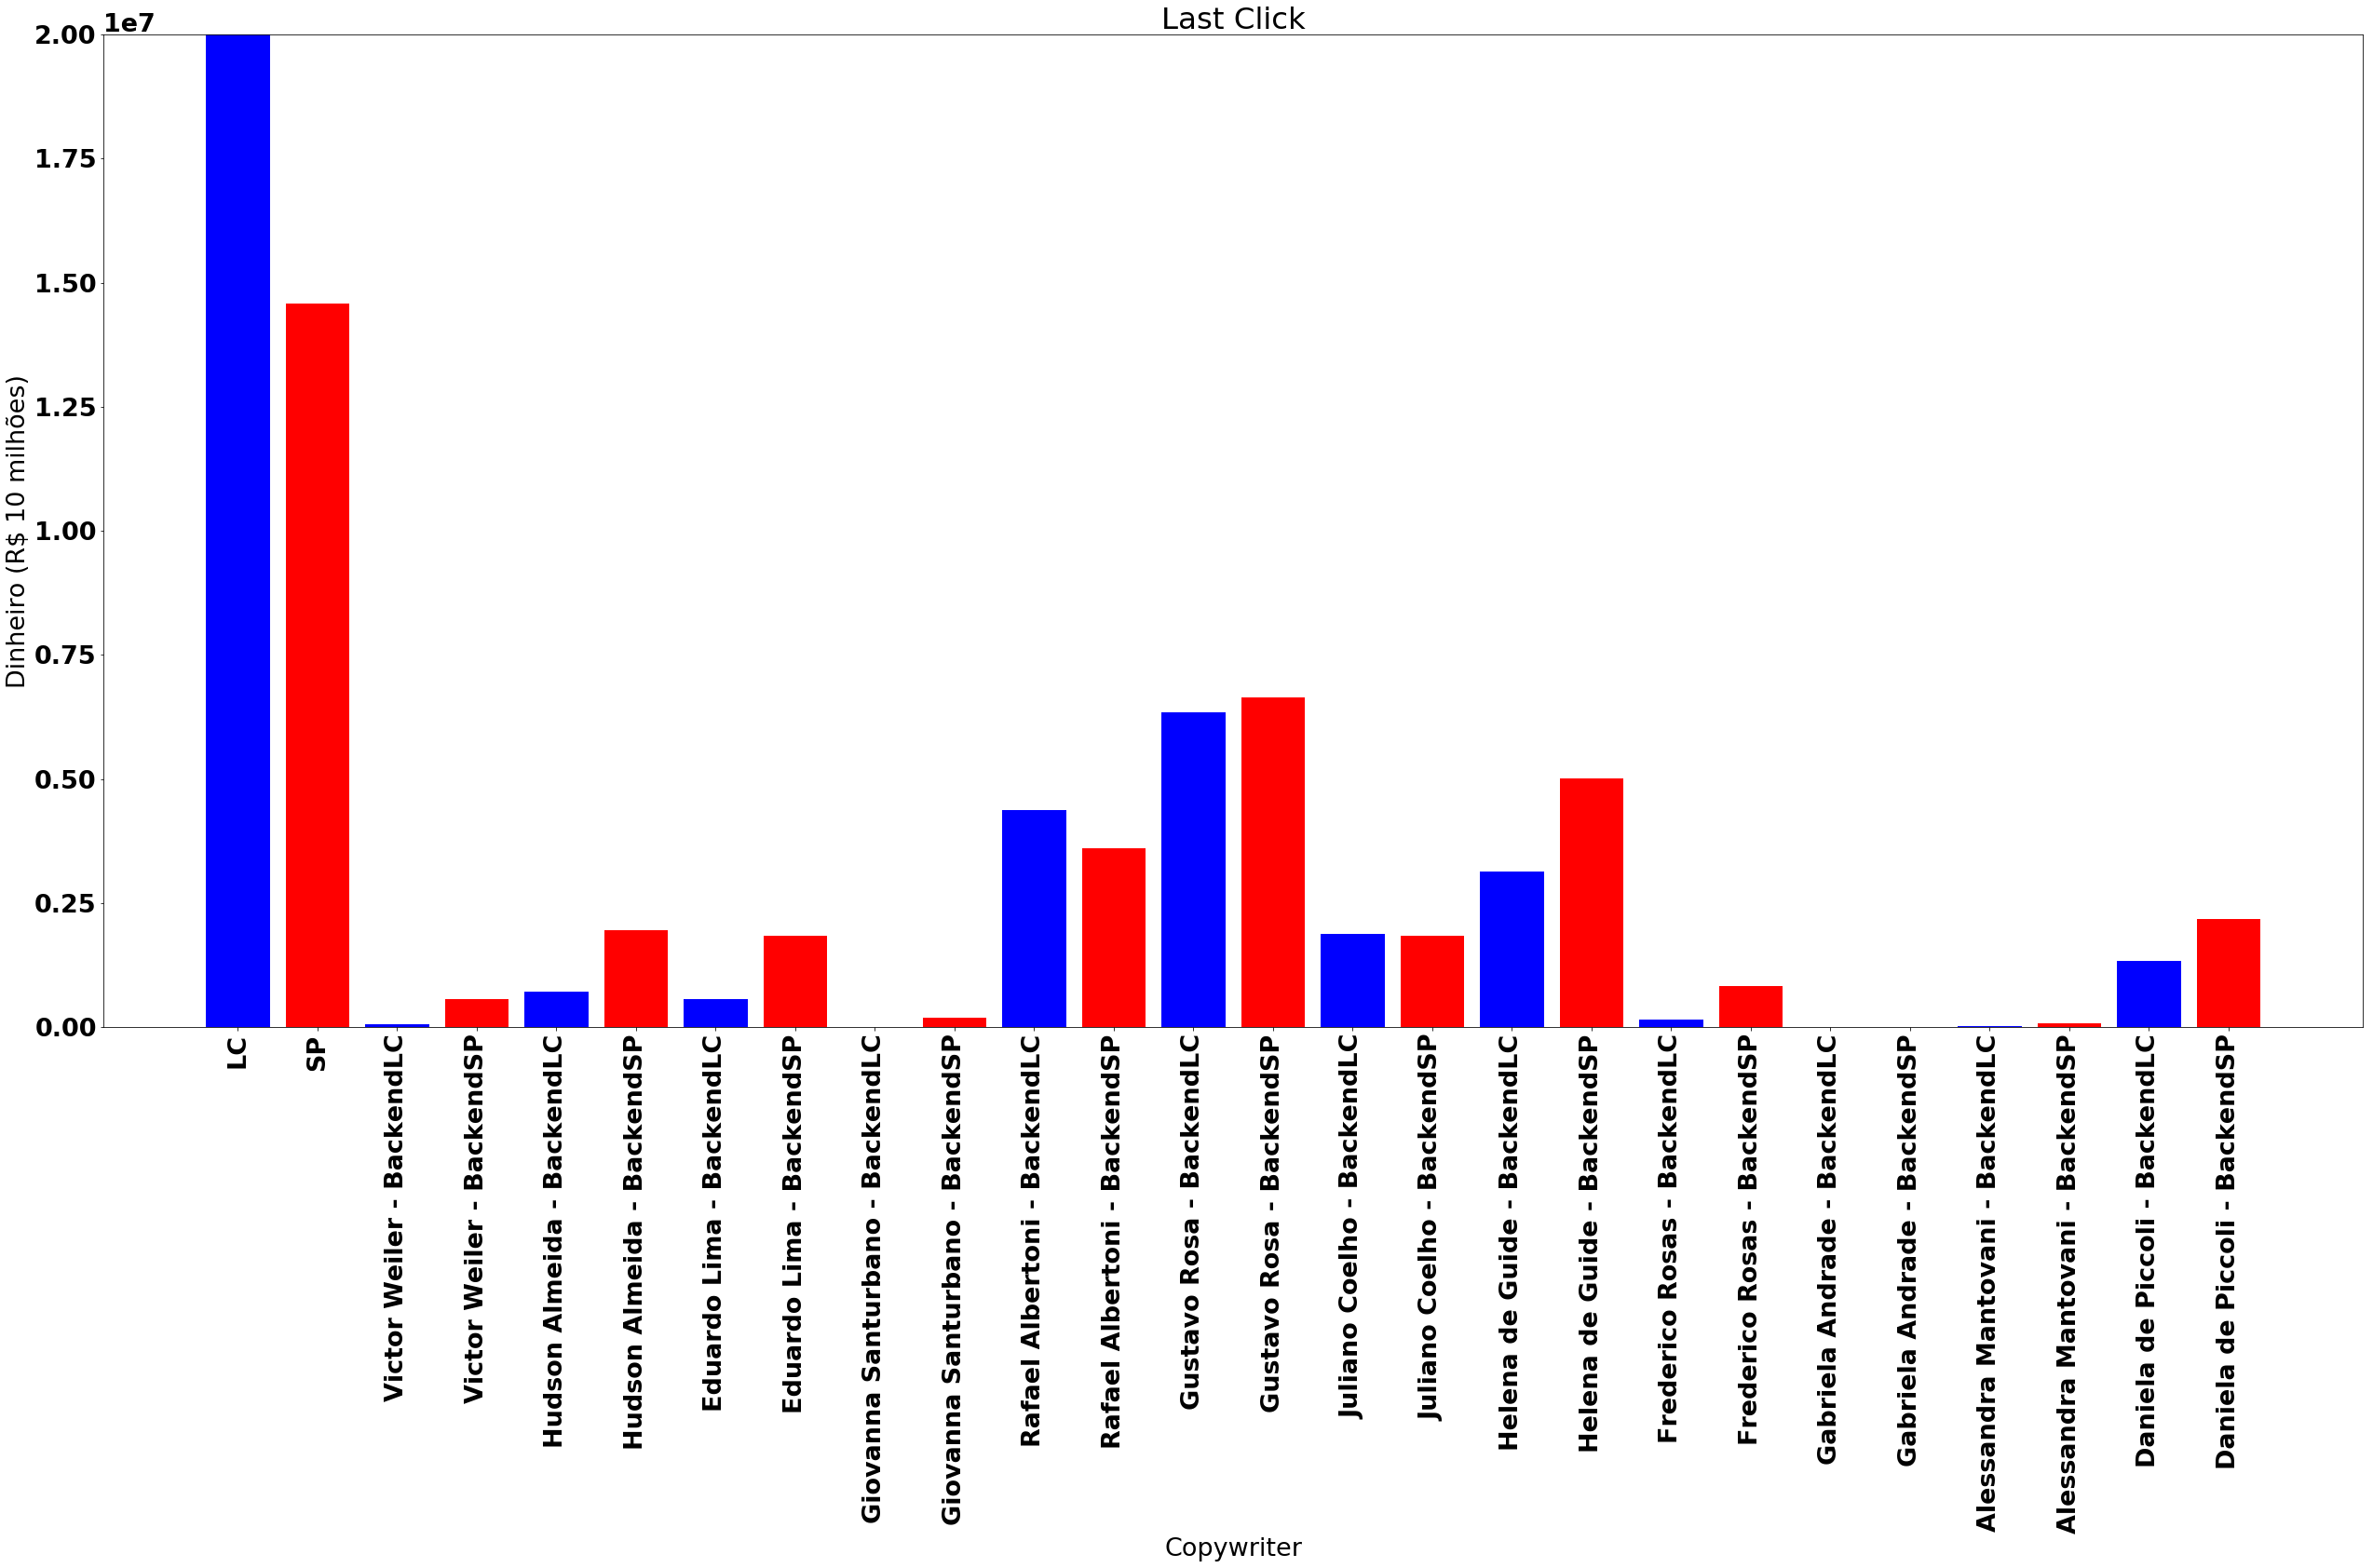

In [142]:
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(36, 24))
ax = fig.add_subplot(111)
#rects = ax.bar(vendas.keys(), vendas.values(), color='b')
for k in lc_receita_back.keys() | shapley_receita_back.keys():
    ax.bar(k + 'LC', lc_receita_back.get(k, 0), color='b')
    ax.bar(k + 'SP', shapley_receita_back.get(k, 0), color='r')
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 27}
matplotlib.rc('font', **font)
plt.title('Last Click')
plt.xlabel('Copywriter')
plt.ylabel('Dinheiro (R$ 10 milhões)')
plt.ylim((0, 20000000))
plt.xticks(rotation='vertical')
#autolabel(rects, vendas)
plt.tight_layout()
plt.savefig('conversions.png', format='png')
plt.show()

In [241]:
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR')

def autolabel(rects, kv):
    vals = list(kv.values())
    for ii, rect in enumerate(rects):
        plt.text(rect.get_width() + 1300000, rect.get_y()+0.2, locale.format('%d', vals[ii], 
                                                                             grouping=True), ha='center',
                 va='bottom')

In [246]:
print(lc_conv_back[''] + lc_conv_front[''])
print(shapley_conv_back[''] + shapley_conv_front[''])

52253
37545.75839160851


In [250]:
sum(lc_conv_back.values()) + sum(lc_conv_front.values())

76258

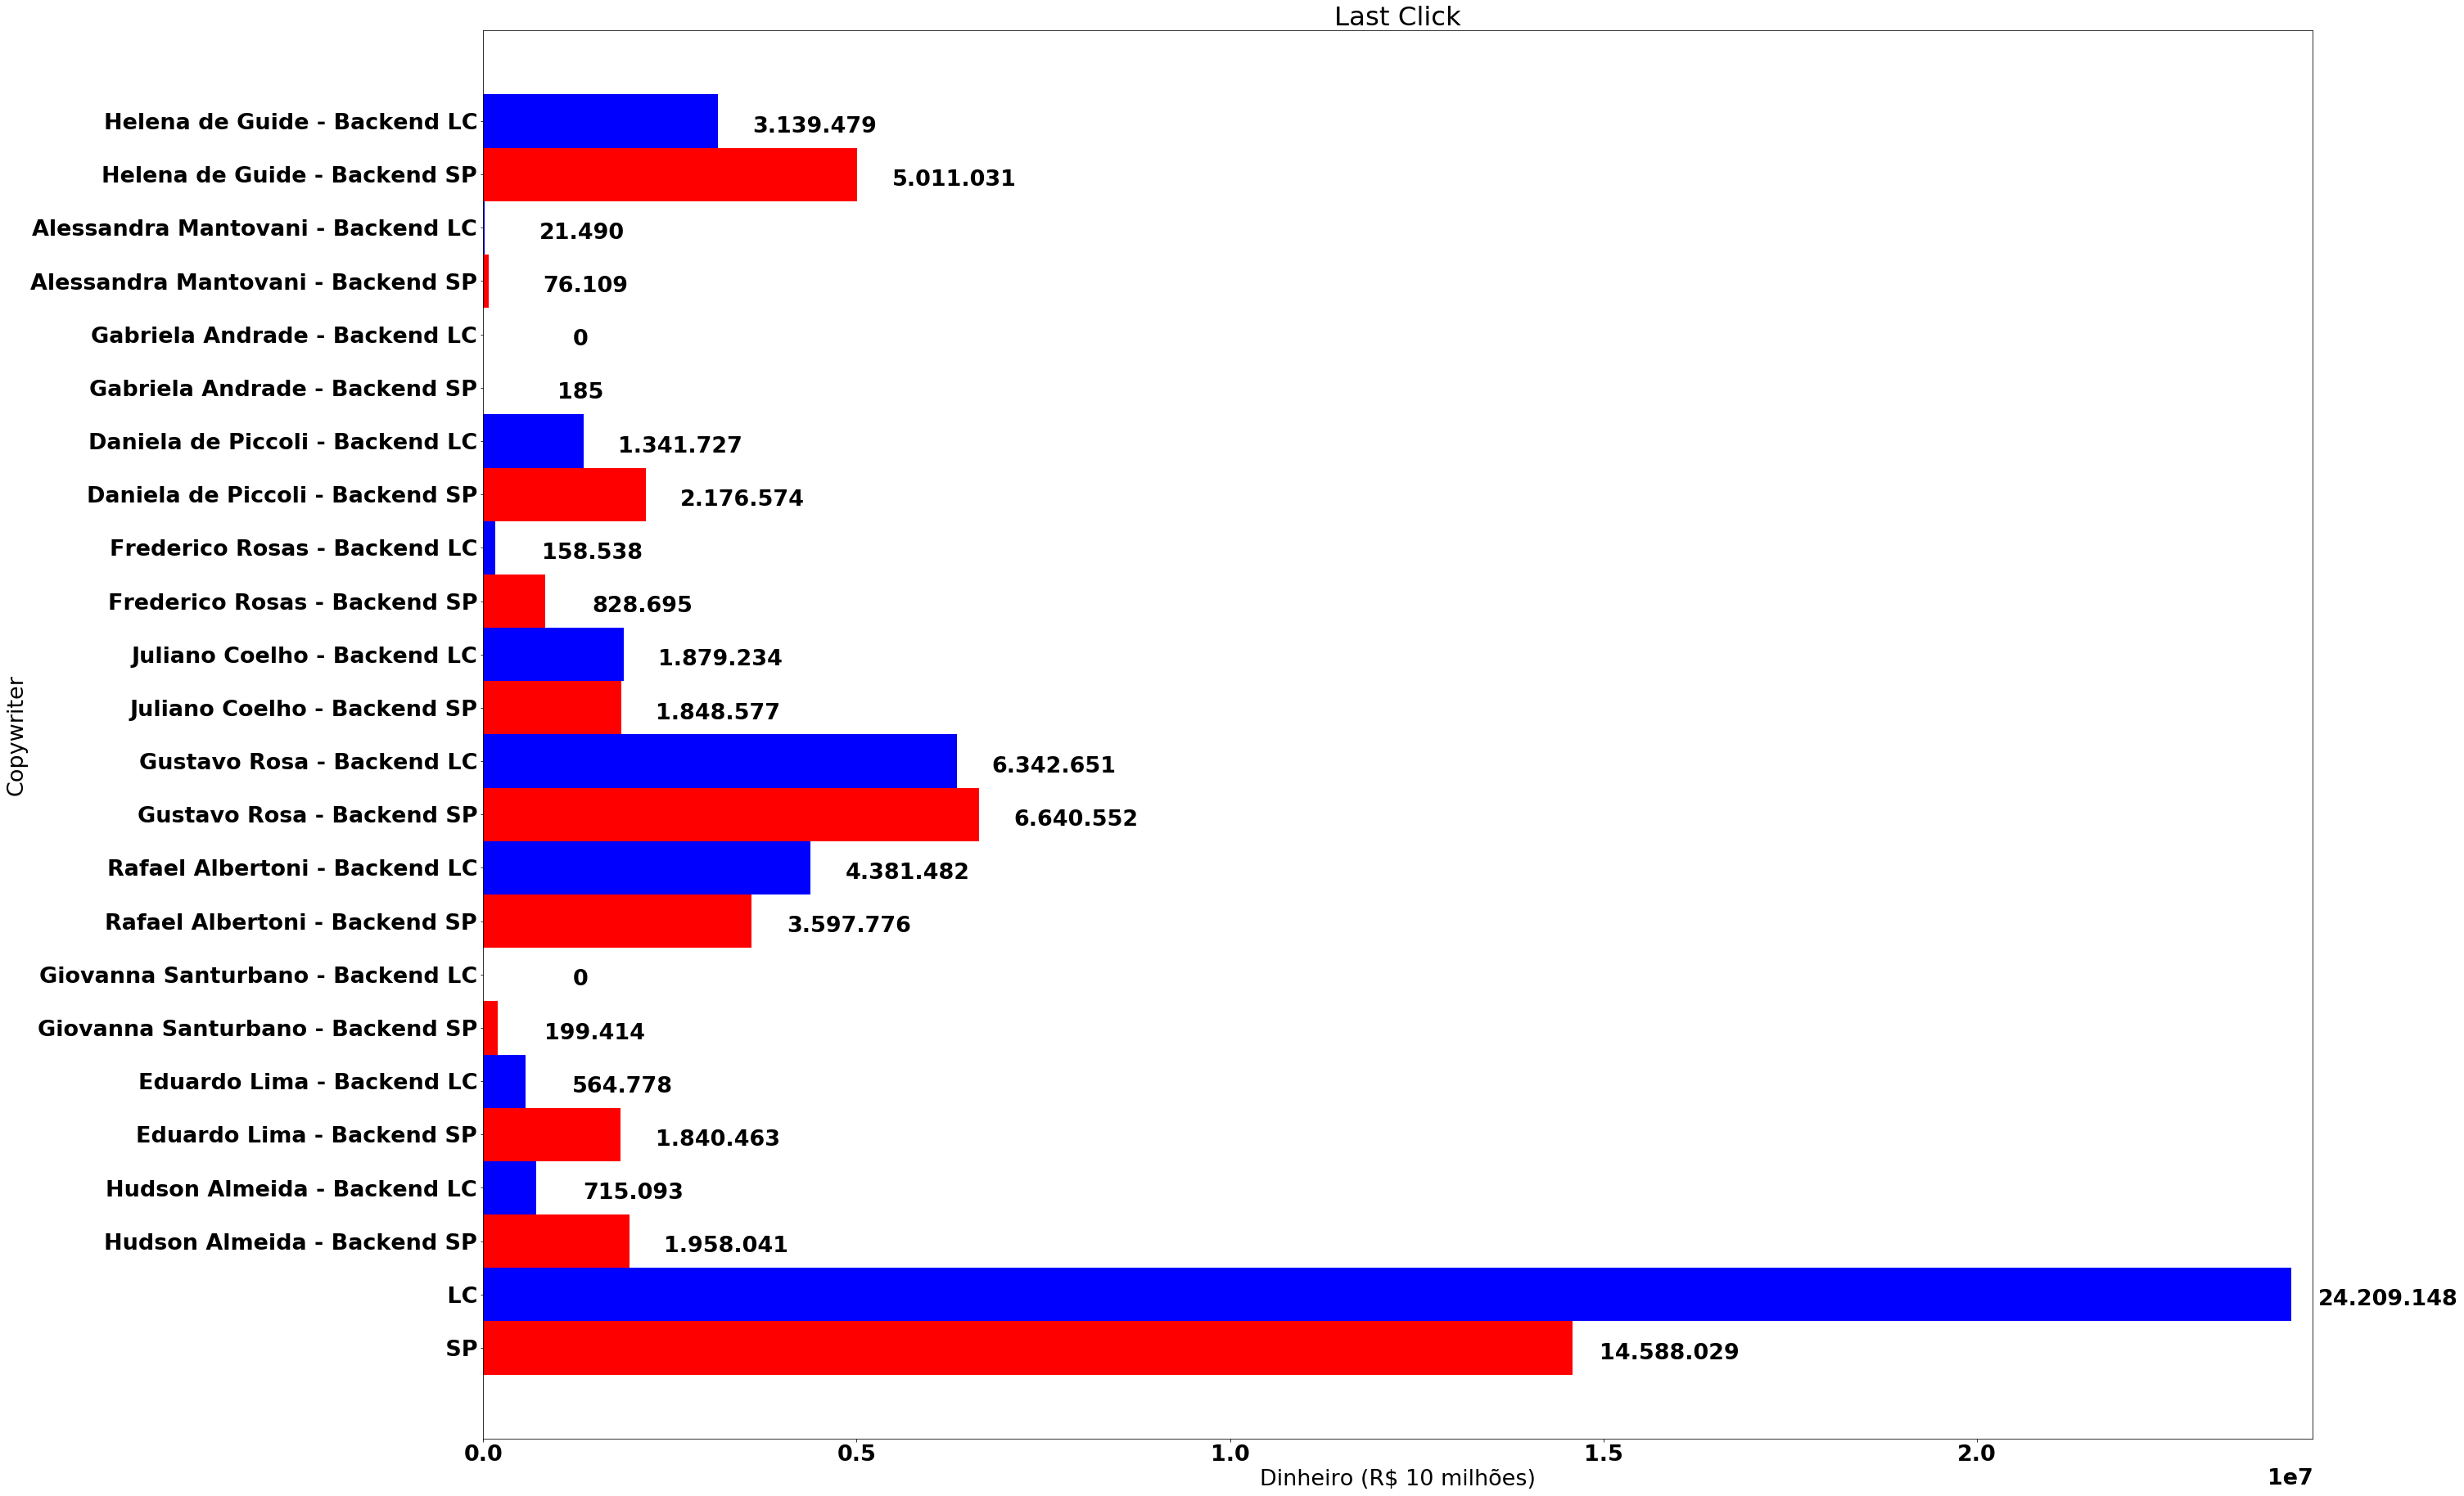

In [242]:
import matplotlib
import matplotlib.pyplot as plt

comp = {}
for k in shapley_receita_back.keys() | lc_receita_back.keys():
    comp[k + ' SP'] = int(shapley_receita_back.get(k, 0))
    comp[k + ' LC'] = int(lc_receita_back.get(k, 0))
fig = plt.figure(figsize=(40, 26))
ax = fig.add_subplot(111)
bar_width = 1
rects = []
for k, v in comp.items():
    color = 'b' if 'LC' in k else 'r'
    rects.append(ax.barh(k, v, bar_width, color=color)[0])
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 27}
matplotlib.rc('font', **font)
plt.title('Last Click')
plt.ylabel('Copywriter')
plt.xlabel('Dinheiro (R$ 10 milhões)')
plt.xlim((0, 24500000))
plt.yticks(rotation='horizontal')
autolabel(rects, comp)
plt.tight_layout()
plt.savefig('conversions.png', format='png')
plt.show()